In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
pills = pd.read_csv('../arcos-ca/pills.csv')
place = 2
pills = pills.sort_values(by='Pills', ascending=False).iloc[[place]]
#pills = pills.sort_values(by='Pills', ascending=False).head(100)
zipcode = pills['Zip Code']

In [110]:
df = pd.read_csv('data/10zp05ca.csv')
df1 = df[['Zip Code', 'Size AGI', 'Taxable Income Returns']]
df2 = df[['Zip Code', 'Size AGI', 'Unemployment Returns']]
#df1 = df[['Zip Code', 'Size AGI', 'AGI']]
#df2 = df[['Zip Code', 'Size AGI', 'Taxable Income Amount']]

In [111]:
columns = sorted(df['Size AGI'].unique())
def plt_df(df, bottom=False):
    names = df.columns[2]
    df = df.set_index(['Zip Code', 'Size AGI'])
    index = df.unstack().index
    values = df.unstack().values
    mydf = pd.DataFrame(values, index=index, columns=columns)
    mydf = mydf[['1 under 25K', '25K under 50K', '50K under 75K', '75K under 100K', '100K under 200K', '200K or more']]
    inrng = list(mydf.columns)
    values = np.zeros(len(inrng))
    for zc in zipcode:
        values += mydf[mydf.index == zc].values.flatten()
    plt.barh(inrng, values, zorder=3, label=names)

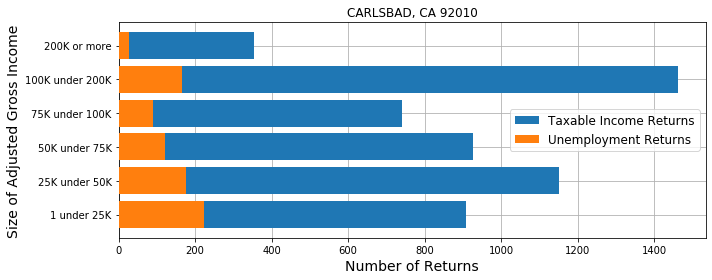

In [112]:
plt.figure(figsize=(10, 4))
p1 = plt_df(df1)
p2 = plt_df(df2)
if len(pills) == 1:
    plt.title(f"{pills['City'].values[0]}, CA {pills['Zip Code'].values[0]}")
else:
    plt.title(f'Top {len(pills)} Cities', size=24)
plt.xlabel('Number of Returns', size=14)
plt.ylabel('Size of Adjusted Gross Income', size=14)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"{pills['City'].values[0]}.png")